<a href="https://colab.research.google.com/github/sudip234-source/Laptop-Price-Prediction/blob/main/Project_Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets files/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.shape

(1303, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [ ]:
for column in df.columns:
  print(column,':',df[column].nunique())

Company : 19
TypeName : 6
Inches : 18
ScreenResolution : 40
Cpu : 118
Ram : 9
Memory : 39
Gpu : 110
OpSys : 9
Weight : 179
Price : 791


In [ ]:
df.TypeName.value_counts()

,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


In [ ]:
df.duplicated().sum()

29

In [ ]:
df.rename(columns={'Ram':'ram','Weight':'weight'},inplace=True)

In [ ]:
df['ram_gb'] = df.ram.str.split("G").str[0].astype('int')
df['weight_kg'] = df.weight.str.split("k").str[0].astype('float')
df.drop('ram',axis=1,inplace=True)
df.drop('weight',axis=1,inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price,ram_gb,weight_kg
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,8,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,8,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,8,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,16,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,8,1.37


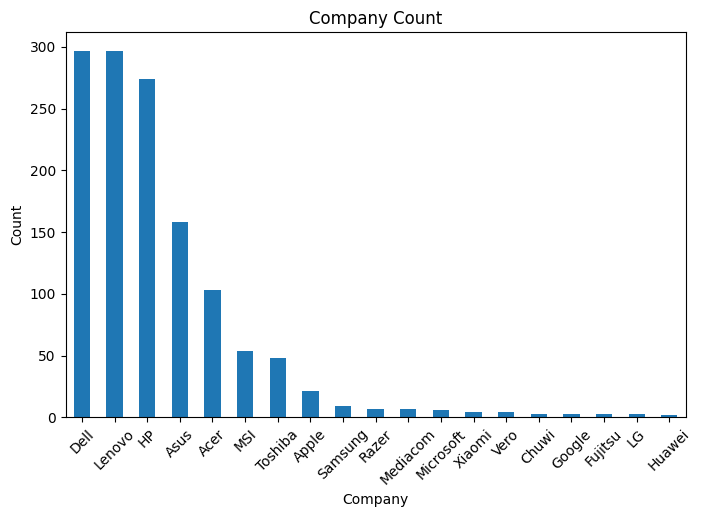

In [ ]:
df.Company.value_counts().plot(kind='bar',figsize=(8,5))
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Company Count')
plt.xticks(rotation=45)
plt.show()

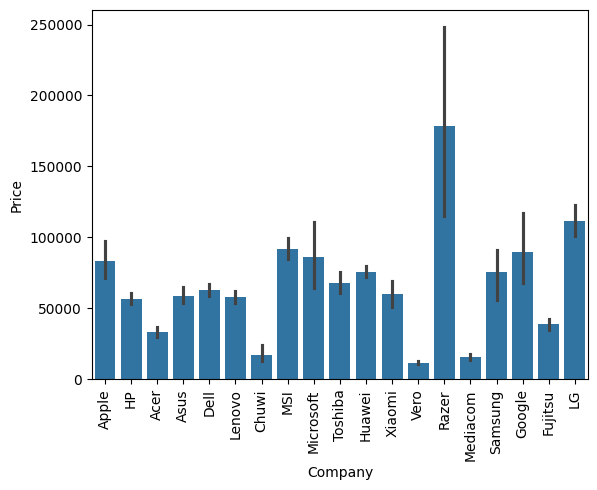

In [ ]:
sns.barplot(data = df,x='Company',y='Price')
plt.xticks(rotation='vertical')
plt.show()

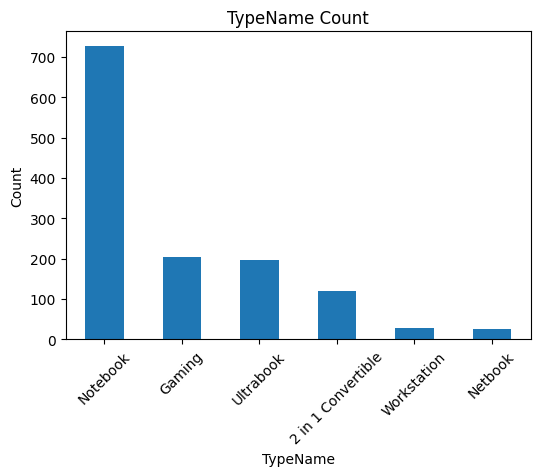

In [ ]:
df.TypeName.value_counts().plot(kind='bar',figsize=(6,4))
plt.xlabel('TypeName')
plt.ylabel('Count')
plt.title('TypeName Count')
plt.xticks(rotation=45)
plt.show()

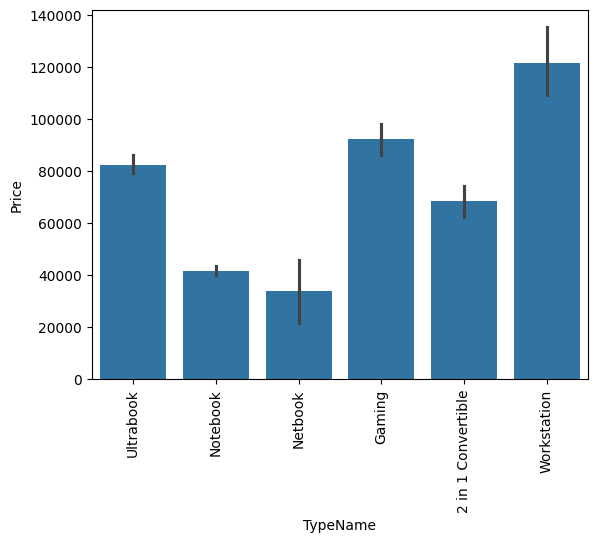

In [ ]:
sns.barplot(data = df,x='TypeName',y='Price')
plt.xticks(rotation='vertical')
plt.show()

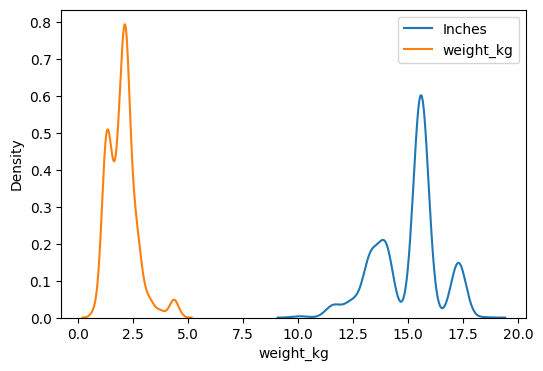

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(df.Inches,hist=False,label='Inches')

sns.distplot(df.weight_kg,hist=False,label='weight_kg')
plt.legend()
plt.show()

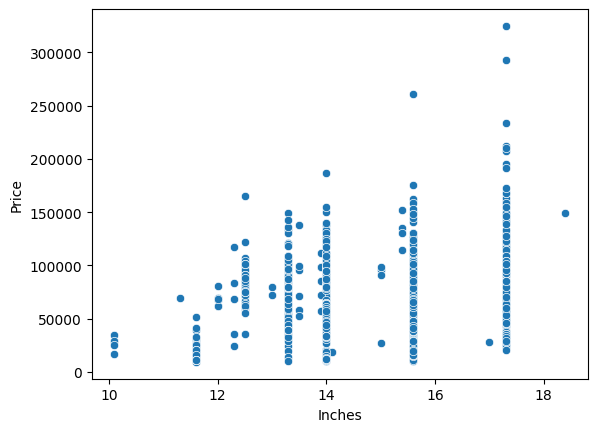

In [ ]:
sns.scatterplot(data=df,x='Inches',y='Price')
plt.show()

In [ ]:
df.ScreenResolution.value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
df['Touch_Screen'] = df.ScreenResolution.apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS_Panel'] = df.ScreenResolution.apply(lambda x:1 if 'IPS' in x else 0)

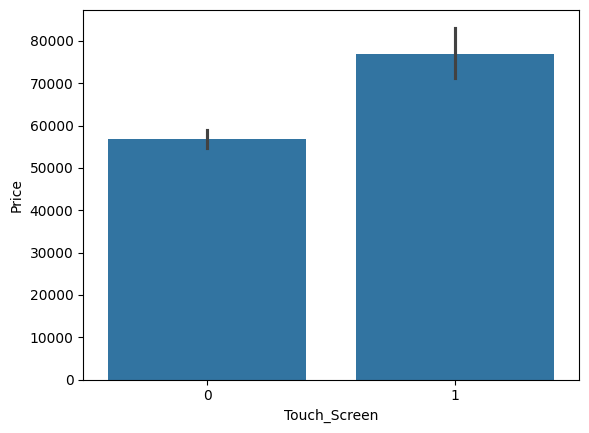

In [ ]:
sns.barplot(data=df,x='Touch_Screen',y='Price')
plt.show()

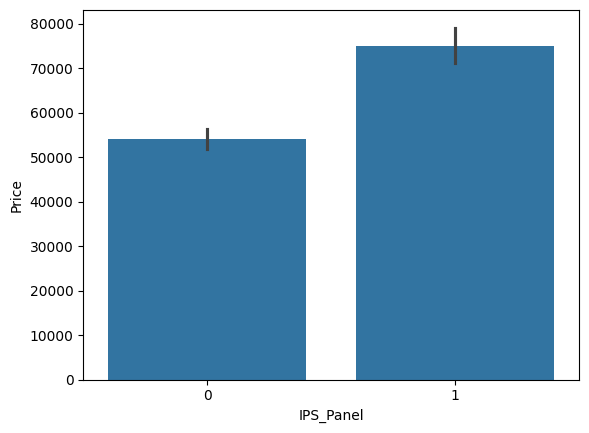

In [ ]:
sns.barplot(data=df,x='IPS_Panel',y='Price')
plt.show()

In [ ]:
df[['x_res', 'y_res']] = df["ScreenResolution"].str.extract(r'(\d+)x(\d+)')

# Convert to integer type
df['x_res'] = df['x_res'].astype(int)
df['y_res'] = df['y_res'].astype(int)
df.drop('ScreenResolution',axis=1,inplace=True)
df.head()

,Company,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price,ram_gb,weight_kg,Touch_Screen,IPS_Panel,x_res,y_res
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,8,1.37,0,1,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,8,1.34,0,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,8,1.86,0,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,16,1.83,0,1,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,8,1.37,0,1,2560,1600


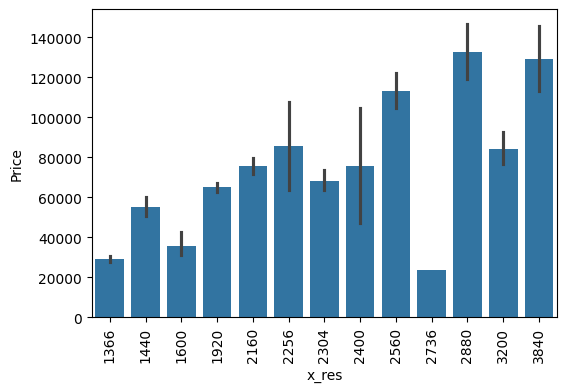

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=df,x='x_res',y='Price')
plt.xticks(rotation='vertical')
plt.show()

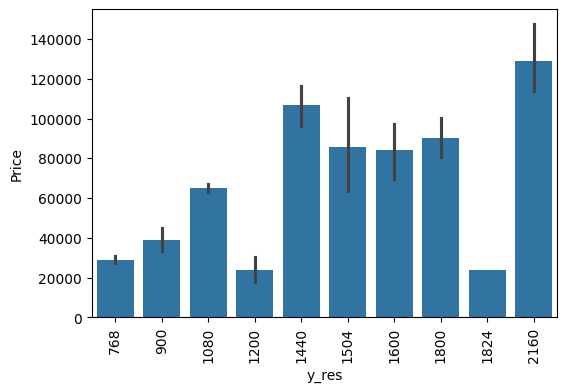

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=df,x='y_res',y='Price')
plt.xticks(rotation='vertical')
plt.show()

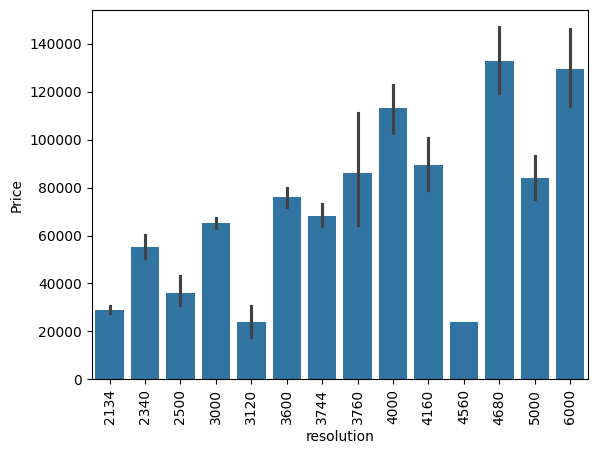

In [ ]:
df['resolution'] = df.x_res+df.y_res
sns.barplot(data=df,x='resolution',y='Price')
plt.xticks(rotation='vertical')
plt.show()

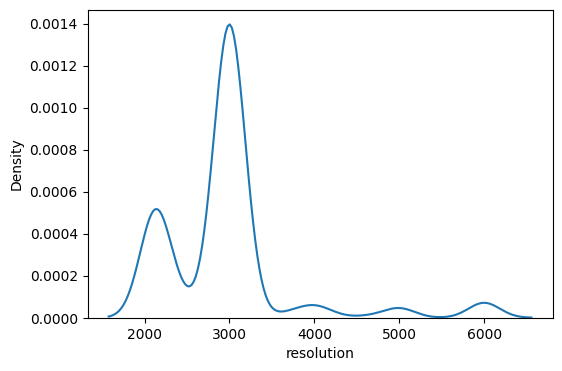

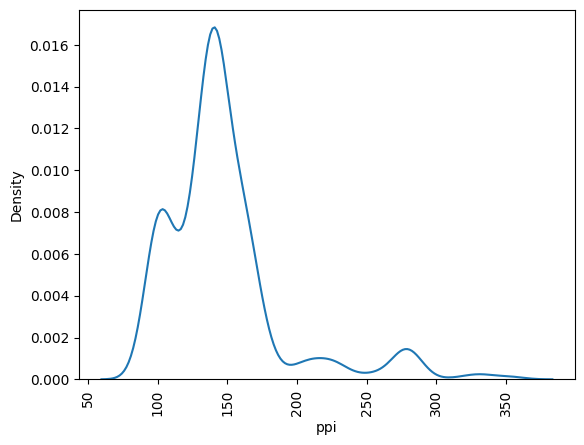

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(df.resolution,hist=False)
plt.show()
df['ppi'] = (df.x_res**2 + df.y_res**2)**0.5/df.Inches
# sns.scatterplot(data=df,x='ppi',y='Price')
plt.xticks(rotation='vertical')
sns.distplot(df.ppi,hist=False)
plt.show()

In [ ]:
df.drop('Inches',axis=1,inplace=True)

In [ ]:
df['processor'] = df.Cpu.apply(lambda x:" ".join(x.split()[0:3]))
df.head(3)

,Company,TypeName,Cpu,Memory,Gpu,OpSys,Price,ram_gb,weight_kg,Touch_Screen,IPS_Panel,x_res,y_res,resolution,ppi,processor
0,Apple,Ultrabook,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,8,1.37,0,1,2560,1600,4160,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,8,1.34,0,0,1440,900,2340,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,8,1.86,0,0,1920,1080,3000,141.211998,Intel Core i5


In [ ]:
def find_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0]=='Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Ryzen'

In [ ]:
df['cpu_brand'] = df.processor.apply(find_processor)
df.sample(3)

,Company,TypeName,Cpu,Memory,Gpu,OpSys,Price,ram_gb,weight_kg,Touch_Screen,IPS_Panel,x_res,y_res,resolution,ppi,processor,cpu_brand
894,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,512GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,141138.720,16,2.43,0,1,3840,2160,6000,254.671349,Intel Core i7,Intel Core i7
612,Dell,Notebook,Intel Core i3 6006U 2.0GHz,1TB HDD,Intel HD Graphics 520,Linux,23650.992,4,2.18,0,0,1366,768,2134,100.454670,Intel Core i3,Intel Core i3
497,HP,Notebook,Intel Core i7 7600U 2.8GHz,1TB SSD,Intel HD Graphics 620,Windows 10,93186.720,8,1.48,0,0,1920,1080,3000,157.350512,Intel Core i7,Intel Core i7


In [ ]:
df['clock_speed_GHz'] = df.Cpu.apply(lambda x : x.split()[-1])
df.clock_speed_GHz = df.clock_speed_GHz.str.replace('GHz','').astype('float')
df.clock_speed_GHz.head()

,clock_speed_GHz
0,2.3
1,1.8
2,2.5
3,2.7
4,3.1


In [ ]:
df['model'] = df.Cpu.apply(lambda x: x.split()[-2])

In [ ]:
count = 0
for i in df.model:
  if i == 'i3' or i == 'i5' or i == 'i7':
    count +=1
count

16

In [ ]:
def check_model(model):
    if model in ['i3', 'i5', 'i7']:  # Check if model is exactly 'i3', 'i5', or 'i7'
        return 'i-series'
    elif 'U' in model:  # Check if 'U' is present in the model string
        return "Ultrabook"
    elif 'HQ' in model:  # Check if 'HQ' is present in the model string
        return 'HQ'
    else:
        return model  # Return the original value if no condition is met

# Apply function to the 'model' column
df["model_category"] = df["model"].apply(check_model)

In [ ]:
df.model.dtype

dtype('O')

In [ ]:
# Threshold for top categories
threshold = 10

# Get the top 10 most frequent categories
top_categories = df["model_category"].value_counts().nlargest(threshold).index.tolist()

# Function to group rare categories as "Others"
def categorize(model):
    return model if model in top_categories else "Others"

# Apply function
df["grouped_category"] = df["model_category"].apply(categorize)

In [ ]:
df.grouped_category.value_counts()

,count
grouped_category,
Ultrabook,802
HQ,249
Others,114
N3350,33
N3060,29
i-series,16
N4200,15
9420,12
N3710,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Cpu               1303 non-null   object 
 3   Memory            1303 non-null   object 
 4   Gpu               1303 non-null   object 
 5   OpSys             1303 non-null   object 
 6   Price             1303 non-null   float64
 7   ram_gb            1303 non-null   int64  
 8   weight_kg         1303 non-null   float64
 9   Touch_Screen      1303 non-null   int64  
 10  IPS_Panel         1303 non-null   int64  
 11  x_res             1303 non-null   int64  
 12  y_res             1303 non-null   int64  
 13  resolution        1303 non-null   int64  
 14  ppi               1303 non-null   float64
 15  processor         1303 non-null   object 
 16  cpu_brand         1303 non-null   object 


In [ ]:
df.drop(['Cpu','model','model_category','processor'],axis=1,inplace=True)
df.sample(4)

,Company,TypeName,Memory,Gpu,OpSys,Price,ram_gb,weight_kg,Touch_Screen,IPS_Panel,x_res,y_res,resolution,ppi,cpu_brand,clock_speed_GHz,grouped_category
498,Lenovo,Notebook,256GB SSD,Intel HD Graphics 620,Windows 10,50562.72,8,1.40,0,1,1920,1080,3000,165.632118,Intel Core i3,2.4,Ultrabook
621,Lenovo,Notebook,256GB SSD,Intel HD Graphics 520,Windows 7,78055.20,8,1.65,0,0,1920,1080,3000,157.350512,Intel Core i5,2.3,Ultrabook
609,Acer,Notebook,128GB Flash Storage,Intel HD Graphics 405,Windows 10,18594.72,4,1.60,0,0,1366,768,2134,111.935204,Other Intel Processor,1.6,N3710
251,Asus,Gaming,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,95850.72,16,4.30,0,0,1920,1080,3000,127.335675,Intel Core i7,2.8,HQ


In [ ]:
df.Memory.value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [ ]:
import re

In [ ]:
def classify_storage(storage):
    storage = storage.lower()
    if "ssd" in storage and "hdd" in storage:
        return "Mixed (SSD + HDD)"
    elif "ssd" in storage:
        return "SSD"
    elif "hdd" in storage:
        return "HDD"
    elif "hybrid" in storage:
        return "Hybrid"
    elif "flash storage" in storage:
        return "Flash Storage"
    else:
        return "Other"

# Function to extract GB and TB storage separately
def extract_storage_sizes(storage):
    gb_size, tb_size = 0, 0  # Default values
    matches = re.findall(r'(\d+\.?\d*)(GB|TB)', storage, re.IGNORECASE)

    for size, unit in matches:
        size = float(size)  # Convert string to float
        if unit.upper() == "GB":
            gb_size += size
        elif unit.upper() == "TB":
            tb_size += size

    return gb_size, tb_size

# Apply classification functions
df["storage_category"] = df["Memory"].apply(classify_storage)
df[["GB_Storage", "TB_Storage"]] = df["Memory"].apply(lambda x: pd.Series(extract_storage_sizes(x)))


In [ ]:
df.sample(4)

,Company,TypeName,Memory,Gpu,OpSys,Price,ram_gb,weight_kg,Touch_Screen,IPS_Panel,x_res,y_res,resolution,ppi,cpu_brand,clock_speed_GHz,grouped_category,storage_category,GB_Storage,TB_Storage
453,Lenovo,Notebook,256GB SSD,Intel HD Graphics 620,Windows 10,71661.600,8,1.65,0,0,1920,1080,3000,157.350512,Intel Core i5,2.5,Ultrabook,SSD,256.0,0.0
462,Asus,Notebook,1TB HDD,Intel HD Graphics 620,Windows 10,39906.720,8,2.37,0,0,1920,1080,3000,141.211998,Intel Core i5,2.5,Ultrabook,HDD,0.0,1.0
7,Apple,Ultrabook,256GB Flash Storage,Intel HD Graphics 6000,macOS,61735.536,8,1.34,0,0,1440,900,2340,127.677940,Intel Core i5,1.8,i-series,Flash Storage,256.0,0.0
1122,HP,Notebook,256GB SSD,Intel HD Graphics 520,Windows 7,80612.640,8,1.43,0,0,1920,1080,3000,157.350512,Intel Core i5,2.3,Ultrabook,SSD,256.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Memory            1303 non-null   object 
 3   Gpu               1303 non-null   object 
 4   OpSys             1303 non-null   object 
 5   Price             1303 non-null   float64
 6   ram_gb            1303 non-null   int64  
 7   weight_kg         1303 non-null   float64
 8   Touch_Screen      1303 non-null   int64  
 9   IPS_Panel         1303 non-null   int64  
 10  x_res             1303 non-null   int64  
 11  y_res             1303 non-null   int64  
 12  resolution        1303 non-null   int64  
 13  ppi               1303 non-null   float64
 14  cpu_brand         1303 non-null   object 
 15  clock_speed_GHz   1303 non-null   float64
 16  grouped_category  1303 non-null   object 


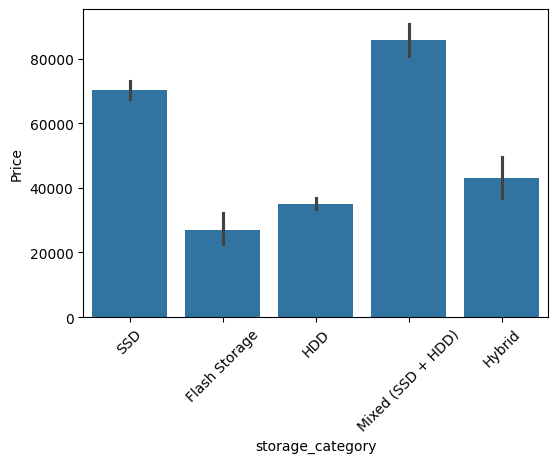

In [297]:
plt.figure(figsize=(6,4))
sns.barplot(data=df,x='storage_category',y='Price')
plt.xticks(rotation=45)
plt.show()

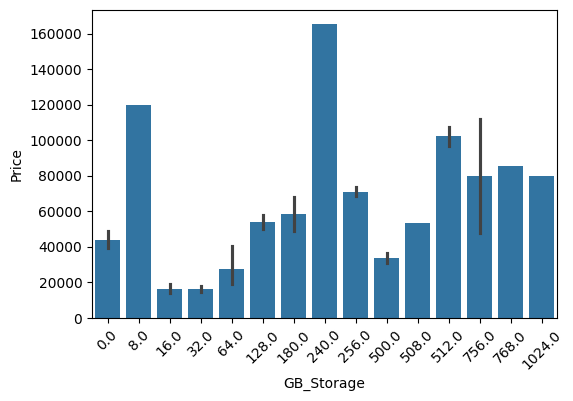

In [299]:
plt.figure(figsize=(6,4))
sns.barplot(data=df,x='GB_Storage',y='Price')
plt.xticks(rotation=45)
plt.show()

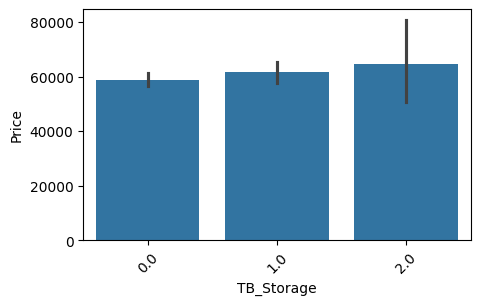

In [300]:
plt.figure(figsize=(5,3))
sns.barplot(data=df,x='TB_Storage',y='Price')
plt.xticks(rotation=45)
plt.show()

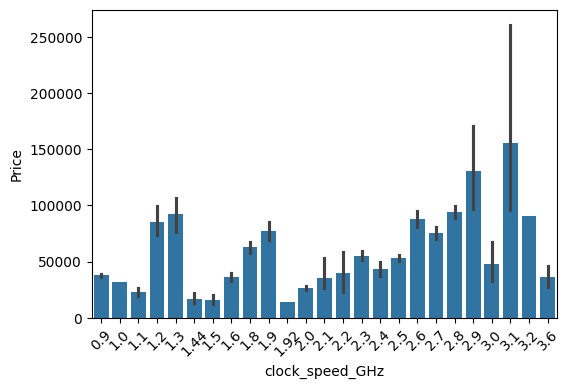

In [303]:
plt.figure(figsize=(6,4))
sns.barplot(data=df,x='clock_speed_GHz',y='Price')
plt.xticks(rotation=45)
plt.show()

In [306]:
def check_graphics(gpu):
  if 'Intel' in gpu:
    return 'Intel Graphics'
  elif 'AMD' in gpu:
    return 'AMD Graphics'
  elif 'Nvidia' in gpu:
    return 'Nvidia Graphics'
  else:
    return 'Other'

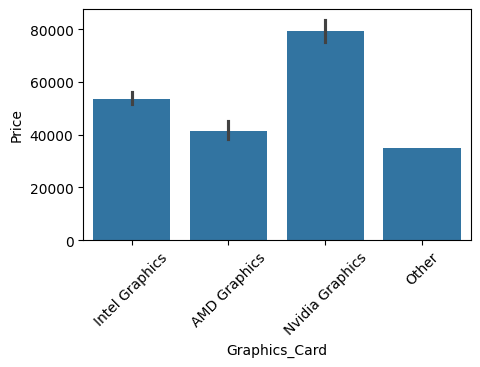

In [307]:
df['Graphics_Card'] = df.Gpu.apply(check_graphics)
plt.figure(figsize=(5,3))
sns.barplot(data=df,x='Graphics_Card',y='Price')
plt.xticks(rotation=45)
plt.show()

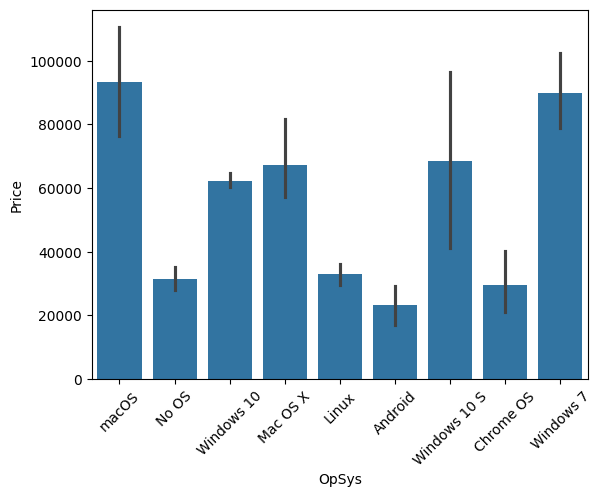

In [309]:
sns.barplot(data=df,x=df.OpSys,y='Price')
plt.xticks(rotation=45)
plt.show()

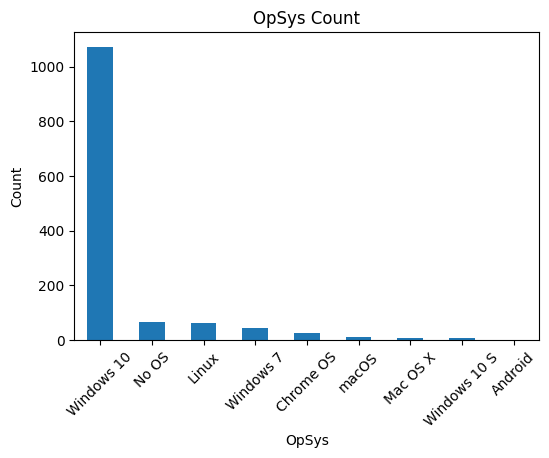

In [313]:
df.OpSys.value_counts().plot(kind='bar',figsize=(6,4))
plt.xlabel('OpSys')
plt.ylabel('Count')
plt.title('OpSys Count')
plt.xticks(rotation=45)
plt.show()

In [314]:
def cat_os(os):
  if os == 'Windows 10' or os == 'Windows 7' or os == 'Windows 10 S':
    return 'Windows'
  elif os == 'macOS' or os == 'Mac OS X':
    return 'Mac'
  elif os == 'Linux':
    return 'Linux'
  else:
    return 'Other'

In [315]:
df['os'] = df.OpSys.apply(cat_os)

In [318]:
# df.drop(['Memory','Gpu'],axis=1,inplace=True)
df.drop('OpSys',axis=1,inplace=True)

In [319]:
df.head()

,Company,TypeName,Price,ram_gb,weight_kg,Touch_Screen,IPS_Panel,x_res,y_res,resolution,ppi,cpu_brand,clock_speed_GHz,grouped_category,storage_category,GB_Storage,TB_Storage,Graphics_Card,os
0,Apple,Ultrabook,71378.6832,8,1.37,0,1,2560,1600,4160,226.983005,Intel Core i5,2.3,i-series,SSD,128.0,0.0,Intel Graphics,Mac
1,Apple,Ultrabook,47895.5232,8,1.34,0,0,1440,900,2340,127.677940,Intel Core i5,1.8,i-series,Flash Storage,128.0,0.0,Intel Graphics,Mac
2,HP,Notebook,30636.0000,8,1.86,0,0,1920,1080,3000,141.211998,Intel Core i5,2.5,Ultrabook,SSD,256.0,0.0,Intel Graphics,Other
3,Apple,Ultrabook,135195.3360,16,1.83,0,1,2880,1800,4680,220.534624,Intel Core i7,2.7,i-series,SSD,512.0,0.0,AMD Graphics,Mac
4,Apple,Ultrabook,96095.8080,8,1.37,0,1,2560,1600,4160,226.983005,Intel Core i5,3.1,i-series,SSD,256.0,0.0,Intel Graphics,Mac


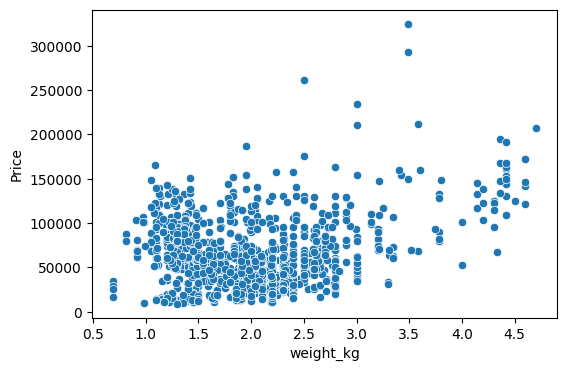

In [321]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='weight_kg',y='Price')
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

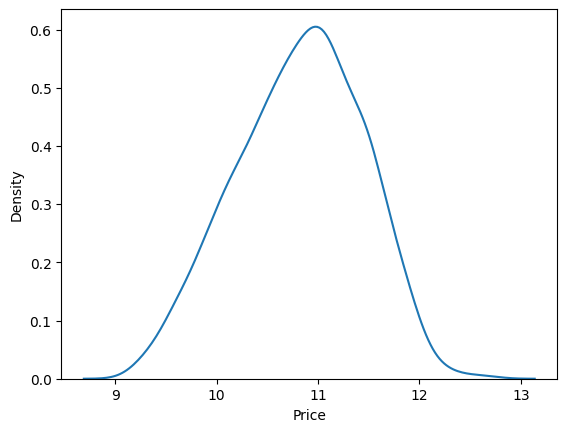

In [331]:
sns.distplot(np.log(df['Price']),hist=False)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Price             1303 non-null   float64
 3   ram_gb            1303 non-null   int64  
 4   weight_kg         1303 non-null   float64
 5   Touch_Screen      1303 non-null   int64  
 6   IPS_Panel         1303 non-null   int64  
 7   x_res             1303 non-null   int64  
 8   y_res             1303 non-null   int64  
 9   resolution        1303 non-null   int64  
 10  ppi               1303 non-null   float64
 11  cpu_brand         1303 non-null   object 
 12  clock_speed_GHz   1303 non-null   float64
 13  grouped_category  1303 non-null   object 
 14  storage_category  1303 non-null   object 
 15  GB_Storage        1303 non-null   float64
 16  TB_Storage        1303 non-null   float64


In [333]:
X = df.drop('Price',axis=1)
y = np.log(df.Price)

In [334]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [335]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [339]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,12,13,16,17])
],remainder='passthrough')

## Linear Regression

In [341]:
from sklearn.linear_model import LinearRegression
step2 = LinearRegression()
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('Traning r2-score',pipe.score(X_train,y_train))
print('Testing R2 score',r2_score(y_test,y_pred))

Traning r2-score 0.8588197686713716
Testing R2 score 0.83457849583609


## Lasso Regression

In [350]:
from sklearn.linear_model import Lasso
step2 = Lasso(alpha=0.0002)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('Traning r2-score',pipe.score(X_train,y_train))
print('Testing R2 score',r2_score(y_test,y_pred))

Traning r2-score 0.8569003849441923
Testing R2 score 0.843451308706963


### KNN

In [360]:
from sklearn.neighbors import KNeighborsRegressor
step2 = KNeighborsRegressor(n_neighbors=5)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('Traning r2-score',pipe.score(X_train,y_train))
print('Testing R2 score',r2_score(y_test,y_pred))

Traning r2-score 0.8705436634644882
Testing R2 score 0.8133569528058181


## Decision Tree

In [370]:
from sklearn.tree import DecisionTreeRegressor
step2 = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('Traning r2-score',pipe.score(X_train,y_train))
print('Testing R2 score',r2_score(y_test,y_pred))

Traning r2-score 0.91602967277353
Testing R2 score 0.8448585818679499


## Support Vector Machine

In [377]:
from sklearn.svm import SVR
step2 = SVR(kernel='rbf',C=10000,epsilon=0.08)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('Traning r2-score',pipe.score(X_train,y_train))
print('Testing R2 score',r2_score(y_test,y_pred))
#

Traning r2-score 0.7972394315199511
Testing R2 score 0.8063517431672345


## Random Forest

In [382]:
from sklearn.ensemble import RandomForestRegressor
step2 = RandomForestRegressor(n_estimators=100,max_depth=10,max_samples=0.4,random_state=2)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('Traning r2-score',pipe.score(X_train,y_train))
print('Testing R2 score',r2_score(y_test,y_pred))

Traning r2-score 0.9334782091128949
Testing R2 score 0.8943545321314877


## Extra Trees

In [389]:
from sklearn.ensemble import ExtraTreesRegressor
step2 = ExtraTreesRegressor(n_estimators=100,max_depth=8,random_state=2)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('Traning r2-score',pipe.score(X_train,y_train))
print('Testing R2 score',r2_score(y_test,y_pred))

Traning r2-score 0.9304849733872302
Testing R2 score 0.8723133030355701


## AdaBoost

In [397]:
from sklearn.ensemble import AdaBoostRegressor
step2 = AdaBoostRegressor(n_estimators=100,learning_rate=1.1,random_state=0)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
print('Training r2 score : ',pipe.score(X_train,y_train))
print('Testing r2 score : ',r2_score(y_test,y_pred))
#

Training r2 score :  0.8334634283284007
Testing r2 score :  0.8723133030355701


## Gradient Boosting

In [402]:
from sklearn.ensemble import GradientBoostingRegressor
step2 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.8,max_depth=1,random_state=0)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
print('Training r2 score : ',pipe.score(X_train,y_train))
print('Testing r2 score : ',r2_score(y_test,y_pred))
#

Training r2 score :  0.8788607377758648
Testing r2 score :  0.8723133030355701


## XgBoosting

In [412]:
from xgboost import XGBRegressor
step2 = XGBRegressor(n_estimators=100,learning_rate=0.02,max_depth=6,random_state=0)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
print('Training r2 score : ',pipe.score(X_train,y_train))
print('Testing r2 score : ',r2_score(y_test,y_pred))
#

Training r2 score :  0.8998318978153946
Testing r2 score :  0.8723133030355701


In [415]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100,150,200,300],'max_depth':[6,8,10,12,14],'max_samples':[0.4,0.5,0.6,0.7],'max_features':[0.4,0.5,0.6,0.7]}

step2 = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
print('Training r2 score : ',pipe.score(X_train,y_train))
print('Testing r2 score : ',r2_score(y_test,y_pred))
#

Training r2 score :  0.9680325018938405
Testing r2 score :  0.8723133030355701


In [416]:
step2.best_params_

{'max_depth': 14, 'max_features': 0.4, 'max_samples': 0.7, 'n_estimators': 300}

In [418]:
step2 = RandomForestRegressor(n_estimators=300,max_depth=14,max_samples=0.7,max_features=0.4,random_state=2)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('Traning r2-score',pipe.score(X_train,y_train))
print('Testing R2 score',r2_score(y_test,y_pred))

Traning r2-score 0.9673789250550061
Testing R2 score 0.9037563492711966
